In [2]:
import holoviews as hv
import numpy as np
import matplotlib.pyplot as plt
hv.extension('matplotlib')

:HoloMap   [phase,frequency]
   :Curve   [x]   (y)
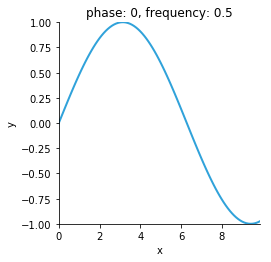
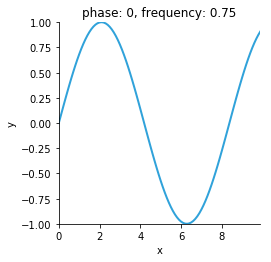
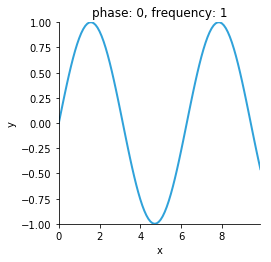
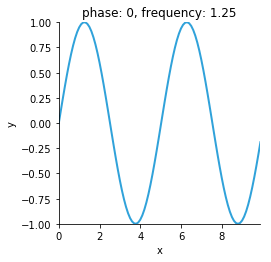
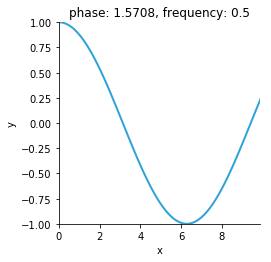
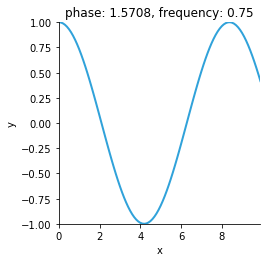
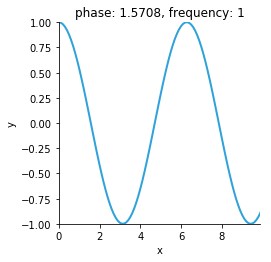
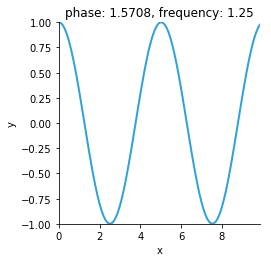
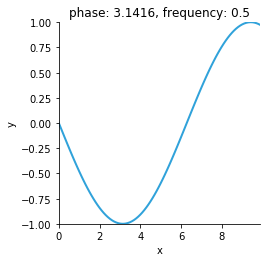
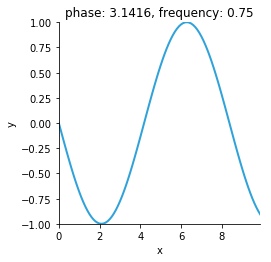
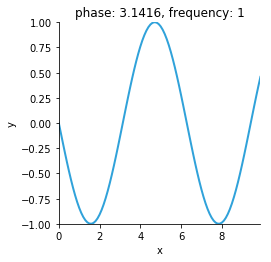
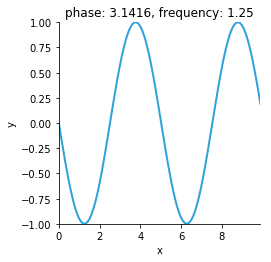
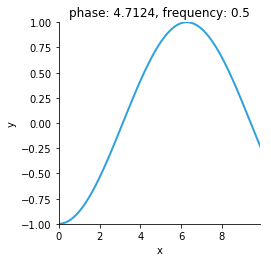
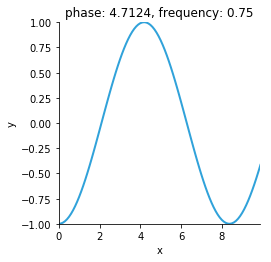
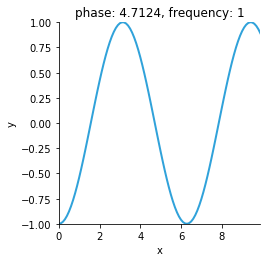
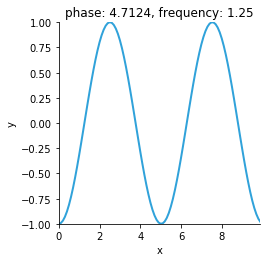

In [4]:
frequencies = np.array([0.5, 0.75, 1.0, 1.25])
phases      = np.array([0, np.pi/2, np.pi, 3*np.pi/2])

def sine_curve(phase, freq):
    xvals = np.array([0.1* i for i in range(100)])
    return hv.Curve((xvals, [np.sin(phase+freq*x) for x in xvals]))


curve_dict_2D = {(p,f):sine_curve(p,f) for p in phases for f in frequencies}
hmap = hv.HoloMap(curve_dict_2D, kdims=['phase', 'frequency'])
hmap

In [ ]:
N =5 
s=100

t = np.linspace(0,4,10)
d = np.linspace(0,4,10)

u_range = np.linspace(0,-4,s)
spectrum = np.zeros((s,N*2))

def buildh(u,t,d):
    hop = -t*np.ones(N-1)
    en=diags([-u*np.ones(N),hop,hop],[0,1,-1]).toarray()

    gap= d*np.ones(N-1)
    ph=diags([gap,-gap],[-1,1]).toarray()

    H=np.zeros((2*N,2*N))
    H[0:N,0:N]=en
    H[N:,N:]=-en
    H[0:N,N:]=ph
    H[N:,0:N] = ph
    return H
    
for t in [0]:#np.arange(s):
    vals, vecs = np.linalg.eigh(buildh(u_range[t]))
    spectrum[t,:] = vals
    
plt.figure()
plt.plot(u_range,spectrum)
plt.xlabel('$\mu/t$')
plt.ylabel('$E$')
plt.show()